# Individual

In [6]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

audio_data = "C:\\Users\\Lavanya Ravinutala\\Downloads\\ravdess\\Actor_01\\03-01-04-02-02-02-01.wav"

x,sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [7]:
print(sr)

22050


In [8]:
import IPython.display as ipd
ipd.Audio(audio_data)

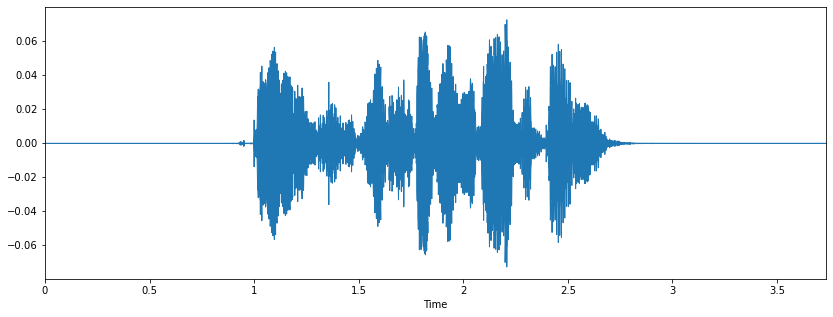

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Feature exctraction


In [10]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd

### Giving emotions as dictionries


In [11]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

In [12]:
#Tess emotions
tess_emotions=['angry','disgust','fear','ps','happy','sad']

#ravdess emotions
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']


#final emotions to observe
observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

## extract_feature() definition:

In [13]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    #print(result)
    return result

In [14]:
def dataset_options():
    # choosing datasets
    ravdess = True
    tess = True
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print("DATASETS USED ARE : Ravdess\ttESS")
    return data

## LOading data:


In [15]:
def load_data(): 
    x,y=[],[]
    c,c1=0,0   
    # feature to extract
    mfcc = True
    chroma=True
    mel=True
    
    data = dataset_options()
    #paths = []
    if data['ravdess']:
        for file in glob.glob("C:\\Users\\Lavanya Ravinutala\\Downloads\\ravdess\\Actor_*\\*.wav"):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion from emotions dictionary using key
            
            if emotion not in observed_emotions:
                continue
            feature=extract_feature(file, mfcc,chroma,mel)
            c=c+1
            x.append(feature)
            y.append(emotion)
           
    if data['tess']:
        for file in glob.glob("C:\\Users\\Lavanya Ravinutala\\Downloads\\tess\\TESS Toronto emotional speech set data\\*AF_*\\*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            

            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions:
                continue

            feature=extract_feature(file, mfcc,chroma,mel)
            c1=c1+1
            #print(feature)
            x.append(feature)
            y.append(emotion)
    print("NO of files in ravdess dataset:",c)
    print("No of files in tess dataset:",c1) 
    return {"X":x,"y":y}

In [16]:
import time
st= time.time()
Trial_dict = load_data()
print(" DATA LOADED SUCCESSFULLY . Loading time: %s seconds ---" % (time.time() - st))
print("COMPLETE")

DATASETS USED ARE : Ravdess	tESS
NO of files in ravdess dataset: 1440
No of files in tess dataset: 2800
 DATA LOADED SUCCESSFULLY . Loading time: 692.8448650836945 seconds ---
COMPLETE


In [17]:
import pandas as pd
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])
print(X.shape,y.shape)

(4240, 180) (4240, 1)


In [18]:
data = pd.concat([X, y], axis =1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,0
0,-707.226318,68.469788,-11.611320,22.716902,-0.303072,5.822211,-6.081500,-2.655389,-9.960321,-5.103168,...,7.123859e-13,4.828430e-13,8.118721e-13,1.687647e-12,3.500356e-12,1.881162e-12,3.081991e-12,2.206314e-12,6.977832e-13,neutral
1,-703.383240,70.197769,-15.213277,27.412649,-0.247905,5.837488,-4.831208,-4.569034,-10.607910,-3.820005,...,8.663430e-13,5.532387e-13,1.016019e-12,1.739981e-12,4.027293e-12,2.397221e-12,4.418747e-12,2.542645e-12,7.244875e-13,neutral
2,-700.794006,70.959595,-11.694939,23.595743,-2.463483,6.388802,-5.021149,-4.631995,-9.482592,-5.633955,...,1.411940e-12,1.064589e-12,2.310054e-12,3.802464e-12,5.353037e-12,3.087828e-12,5.164499e-12,3.851312e-12,2.595323e-12,neutral
3,-694.826050,69.669205,-9.815083,23.888597,-1.381263,8.620013,-4.805181,-6.055672,-9.544140,-5.380029,...,1.590781e-12,1.339222e-12,2.484888e-12,3.250877e-12,3.961606e-12,2.927518e-12,4.272339e-12,3.753536e-12,2.238689e-12,neutral
4,-737.437988,77.273209,-11.190391,26.755884,-1.537418,8.085284,-7.015995,-3.006230,-8.947398,-7.313802,...,3.630840e-13,2.121317e-13,3.764892e-13,5.853325e-13,2.479844e-12,1.447206e-12,2.363926e-12,1.182290e-12,4.276118e-13,calm


In [19]:
y

,0
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
...,...
4235,sad
4236,sad
4237,sad
4238,sad


In [20]:
y=y.rename(columns={0:'Emotion'})


In [21]:
data = pd.concat([X, y], axis =1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
0,-707.226318,68.469788,-11.611320,22.716902,-0.303072,5.822211,-6.081500,-2.655389,-9.960321,-5.103168,...,7.123859e-13,4.828430e-13,8.118721e-13,1.687647e-12,3.500356e-12,1.881162e-12,3.081991e-12,2.206314e-12,6.977832e-13,neutral
1,-703.383240,70.197769,-15.213277,27.412649,-0.247905,5.837488,-4.831208,-4.569034,-10.607910,-3.820005,...,8.663430e-13,5.532387e-13,1.016019e-12,1.739981e-12,4.027293e-12,2.397221e-12,4.418747e-12,2.542645e-12,7.244875e-13,neutral
2,-700.794006,70.959595,-11.694939,23.595743,-2.463483,6.388802,-5.021149,-4.631995,-9.482592,-5.633955,...,1.411940e-12,1.064589e-12,2.310054e-12,3.802464e-12,5.353037e-12,3.087828e-12,5.164499e-12,3.851312e-12,2.595323e-12,neutral
3,-694.826050,69.669205,-9.815083,23.888597,-1.381263,8.620013,-4.805181,-6.055672,-9.544140,-5.380029,...,1.590781e-12,1.339222e-12,2.484888e-12,3.250877e-12,3.961606e-12,2.927518e-12,4.272339e-12,3.753536e-12,2.238689e-12,neutral
4,-737.437988,77.273209,-11.190391,26.755884,-1.537418,8.085284,-7.015995,-3.006230,-8.947398,-7.313802,...,3.630840e-13,2.121317e-13,3.764892e-13,5.853325e-13,2.479844e-12,1.447206e-12,2.363926e-12,1.182290e-12,4.276118e-13,calm


# Storing in excel:

In [24]:
data = data.reindex(np.random.permutation(data.index))
data.to_csv("bothDatasets.csv")


### DATA PREPROCESSING on the obtained excel sheet:


In [26]:
dataframe=pd.read_csv("C:\\Users\\Lavanya Ravinutala\\Downloads\\bothDatasets.csv")


In [28]:
from sklearn.preprocessing import LabelEncoder
dataframe['Emotion']=LabelEncoder().fit_transform(dataframe['Emotion'])




In [29]:
dataframe.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,171,172,173,174,175,176,177,178,179,Emotion
0,1878,-447.247772,53.166103,14.918451,-5.806746,-22.758808,9.060171,-17.049442,13.199282,-24.654446,...,6.412498e-04,3.979829e-04,2.752342e-04,1.696036e-04,6.585263e-05,1.846562e-05,3.302946e-06,4.692493e-07,5.816039e-08,3
1,2531,-391.384796,98.820946,2.165529,-11.264238,-13.886812,-2.131862,-20.587961,5.638855,-23.467472,...,1.401897e-03,1.256487e-03,6.468109e-04,2.725895e-04,8.350501e-05,2.276800e-05,2.939791e-06,4.161839e-07,4.589138e-08,7
2,203,-618.153748,44.089962,-30.880472,15.946032,-23.050499,-4.753069,-13.286512,-15.262258,-9.478625,...,1.028196e-11,1.055849e-11,2.652223e-11,2.328497e-11,2.116721e-11,4.835406e-12,2.709512e-11,2.556316e-11,1.789039e-11,6
3,1759,-460.865448,98.077515,20.562935,-11.406595,-7.367424,6.580828,-8.292226,2.558101,-17.602333,...,1.243220e-03,8.983487e-04,3.825843e-04,1.464136e-04,6.037404e-05,1.760162e-05,2.844160e-06,4.483544e-07,3.572262e-08,2
4,1082,-726.337341,84.495056,-3.160365,36.562057,0.805661,16.977064,-0.337673,-2.713223,-6.195265,...,2.579164e-12,2.239826e-12,2.399079e-12,3.126742e-12,4.653563e-12,2.874980e-12,4.603084e-12,4.083336e-12,2.483952e-12,5


In [30]:
dataframe=dataframe.iloc[:,1:]
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
0,-447.247772,53.166103,14.918451,-5.806746,-22.758808,9.060171,-17.049442,13.199282,-24.654446,4.233087,...,6.412498e-04,3.979829e-04,2.752342e-04,1.696036e-04,6.585263e-05,1.846562e-05,3.302946e-06,4.692493e-07,5.816039e-08,3
1,-391.384796,98.820946,2.165529,-11.264238,-13.886812,-2.131862,-20.587961,5.638855,-23.467472,3.796245,...,1.401897e-03,1.256487e-03,6.468109e-04,2.725895e-04,8.350501e-05,2.276800e-05,2.939791e-06,4.161839e-07,4.589138e-08,7
2,-618.153748,44.089962,-30.880472,15.946032,-23.050499,-4.753069,-13.286512,-15.262258,-9.478625,-7.611061,...,1.028196e-11,1.055849e-11,2.652223e-11,2.328497e-11,2.116721e-11,4.835406e-12,2.709512e-11,2.556316e-11,1.789039e-11,6
3,-460.865448,98.077515,20.562935,-11.406595,-7.367424,6.580828,-8.292226,2.558101,-17.602333,4.513297,...,1.243220e-03,8.983487e-04,3.825843e-04,1.464136e-04,6.037404e-05,1.760162e-05,2.844160e-06,4.483544e-07,3.572262e-08,2
4,-726.337341,84.495056,-3.160365,36.562057,0.805661,16.977064,-0.337673,-2.713223,-6.195265,0.708009,...,2.579164e-12,2.239826e-12,2.399079e-12,3.126742e-12,4.653563e-12,2.874980e-12,4.603084e-12,4.083336e-12,2.483952e-12,5


In [31]:
dataframe.tail()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,Emotion
4235,-358.166473,68.336494,-4.664628,3.103279,-46.188046,1.257413,-6.700675,-4.805393,-15.059759,18.770777,...,3.240437e-03,2.819603e-03,2.616920e-03,1.664649e-03,3.612893e-04,8.940337e-05,2.859218e-05,9.193580e-06,1.245454e-06,7
4236,-282.519897,68.751045,-13.696286,19.284866,-30.101870,-0.152689,3.133794,-19.158222,-6.812610,8.353470,...,2.509447e-02,2.940154e-02,1.857772e-02,1.407316e-02,2.727734e-03,6.957309e-04,3.165783e-04,7.811860e-05,8.980865e-06,0
4237,-475.571503,86.351501,0.758972,2.968638,-0.362706,14.736298,-18.916521,1.994684,-16.754187,4.568054,...,5.394348e-05,3.543787e-05,3.263945e-05,2.111544e-05,1.151857e-05,4.850460e-06,1.255038e-06,2.913940e-07,1.873026e-08,5
4238,-340.224884,44.927399,-19.240963,34.465408,-13.895077,-8.301814,-19.753540,-11.104132,-8.152174,-6.086967,...,2.858910e-03,3.355064e-03,2.968378e-03,1.484952e-03,4.742015e-04,1.376664e-04,8.529562e-05,2.619322e-05,2.164960e-06,4
4239,-710.726074,92.849724,-1.855517,37.792744,6.940712,8.346100,-4.556298,0.528070,5.374463,-2.338298,...,5.573382e-13,9.038703e-13,1.410937e-12,1.281007e-12,2.353969e-12,1.166648e-12,2.473633e-12,1.688879e-12,9.326294e-13,7


## Splitting data:

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
dataframe['Emotion']=LabelEncoder().fit_transform(dataframe['Emotion'])
y=dataframe.iloc[:,-1]
x=dataframe.drop("Emotion",axis=1)
x=x.iloc[:,1:]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=4)

In [35]:
print(xtrain.shape,xtest.shape)


(2968, 179) (1272, 179)


In [36]:
print(ytrain.shape,ytest.shape)


(2968,) (1272,)


# MLP classifier

In [38]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=32, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [40]:
model.fit(xtrain,ytrain)


MLPClassifier(alpha=0.01, batch_size=32, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [41]:
ypred=model.predict(xtest)


# ACCURACY

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_true=ytest, y_pred=ypred)*100

88.28616352201259

In [43]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       189
           1       0.77      0.82      0.80        62
           2       0.95      0.85      0.90       173
           3       0.90      0.86      0.88       185
           4       0.86      0.88      0.87       173
           5       0.91      0.91      0.91       141
           6       0.87      0.91      0.89       185
           7       0.83      0.90      0.86       164

    accuracy                           0.88      1272
   macro avg       0.88      0.88      0.88      1272
weighted avg       0.89      0.88      0.88      1272



## Confusion matrix

In [44]:
print(confusion_matrix(ytest,ypred))


[[170   0   5   1   3   1   3   6]
 [  0  51   0   2   0   4   5   0]
 [  1   5 147   3   0   4   3  10]
 [  7   1   1 159   8   0   5   4]
 [  5   1   1   5 153   0   2   6]
 [  1   5   0   0   2 128   4   1]
 [  0   2   0   6   3   2 168   4]
 [  1   1   1   1   8   2   3 147]]


In [47]:
xtest.shape


(1272, 179)

In [48]:
xnow=xtest.iloc[1,:].to_frame().transpose()


In [49]:
xnow.shape


(1, 179)

In [50]:
ynow=model.predict(xnow)


In [51]:
ynow=model.predict(xnow)


In [52]:
ynow

array([2], dtype=int64)

In [53]:
ytest.iloc[1]


2

## Model saving:

In [54]:
import pickle
filename = 'mlpClassifier.sav'
pickle. dump(model, open(filename, 'wb'))
# load the model from disk.
loaded_model = pickle. load(open(filename, 'rb'))
print("model saved as MLP classifier succesfully!!!!!")

model saved as MLP classifier succesfully!!!!!
